In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
sarima_metrics_df = pd.read_csv(r"C:\Users\Dell\gitproject\Energy_Demand_Forecasting\models\sarima_metrics_summary.csv", index_col=0)
lstm_metrics_df = pd.read_csv(r"C:\Users\Dell\gitproject\Energy_Demand_Forecasting\models\lstm_metrics_summary.csv", index_col=0)
xgb_metrics_df = pd.read_csv(r"C:\Users\Dell\gitproject\Energy_Demand_Forecasting\models\xgboost_metrics_summary.csv", index_col=0)

In [13]:
# Add a model column to each
sarima_metrics_df['Model'] = 'SARIMA'
lstm_metrics_df['Model'] = 'LSTM'
xgb_metrics_df['Model'] = 'XGBoost'


In [15]:
all_metrics_df = pd.concat([sarima_metrics_df, lstm_metrics_df, xgb_metrics_df])

In [17]:
# Reorder columns
all_metrics_df = all_metrics_df[['Model', 'RMSE', 'MAE', 'R2']]

In [19]:
# Reset index for clean plotting
all_metrics_df.reset_index(inplace=True)
all_metrics_df.rename(columns={'index': 'State'}, inplace=True)


In [21]:

# --- Summary Table ---
print("\n--- Combined Model Evaluation Metrics ---\n")
display(all_metrics_df)


--- Combined Model Evaluation Metrics ---



,State,Model,RMSE,MAE,R2
0,Andhra Pradesh,SARIMA,17.527244,15.288213,-0.198403
1,Arunachal Pradesh,SARIMA,0.234493,0.159643,-0.025084
2,Assam,SARIMA,4.477475,3.388206,-0.031772
3,Bihar,SARIMA,17.269292,12.504671,-0.342344
4,Chandigarh,SARIMA,1.309733,1.055816,-0.024671
...,...,...,...,...,...
94,Telangana,XGBoost,31.313842,22.056860,-0.582094
95,Tripura,XGBoost,0.810660,0.633090,-0.480961
96,UP,XGBoost,67.331742,47.098478,0.060262
97,Uttarakhand,XGBoost,6.443762,4.778628,0.128650


In [23]:
# --- Aggregate Summary ---
summary_df = all_metrics_df.groupby("Model")[['RMSE', 'MAE', 'R2']].mean().sort_values("RMSE")
print("\n--- Average Metrics Across States ---\n")
display(summary_df)


--- Average Metrics Across States ---



,RMSE,MAE,R2
Model,,,
LSTM,15.807550,12.528596,0.099173
XGBoost,16.711697,12.236711,-0.110529
SARIMA,17.856519,14.385060,-0.118379


<Figure size 1200x600 with 0 Axes>

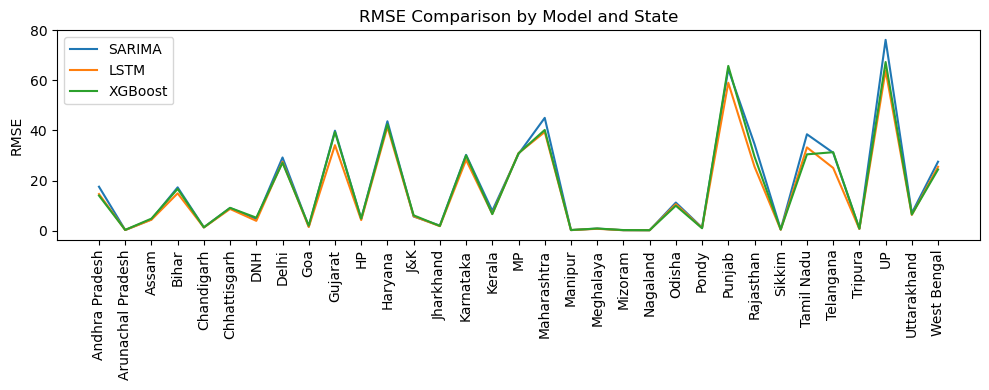

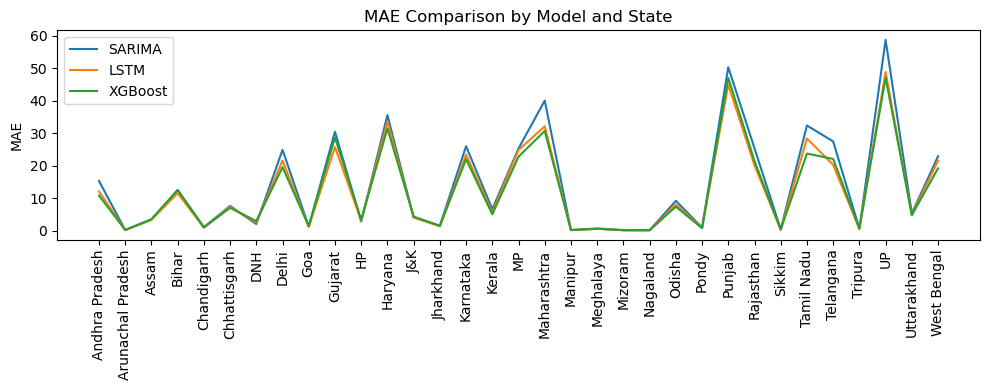

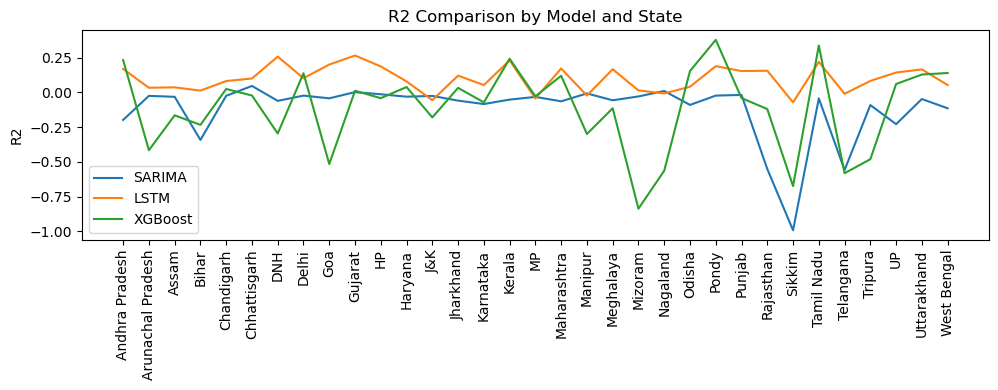

In [25]:
# --- Visualization ---
plt.figure(figsize=(12, 6))
for metric in ['RMSE', 'MAE', 'R2']:
    plt.figure(figsize=(10, 4))
    for model in all_metrics_df['Model'].unique():
        subset = all_metrics_df[all_metrics_df['Model'] == model]
        plt.plot(subset['State'], subset[metric], label=model)
    plt.xticks(rotation=90)
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison by Model and State")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [27]:
# --- Final Recommendation  ---
print("\n--- Model Selection Summary ---\n")
print("1. **SARIMA** performs well when seasonality is strong, and it offers explainability.\n")
print("2. **LSTM** generally performs better in capturing complex temporal dynamics and nonlinear patterns, especially for longer-term dependencies.\n")
print("3. **XGBoost** performs competitively with low error and faster training time, suitable when feature engineering is possible (e.g., date features).\n")

print("\n**Conclusion:**\n")
print("If interpretability and seasonality are critical, SARIMA is suitable. If the data has nonlinear patterns and you want high accuracy, LSTM or XGBoost is better. Based on average RMSE and R2, select the model with the best trade-off between accuracy and performance.")



--- Model Selection Summary ---

1. **SARIMA** performs well when seasonality is strong, and it offers explainability.

2. **LSTM** generally performs better in capturing complex temporal dynamics and nonlinear patterns, especially for longer-term dependencies.

3. **XGBoost** performs competitively with low error and faster training time, suitable when feature engineering is possible (e.g., date features).


**Conclusion:**

If interpretability and seasonality are critical, SARIMA is suitable. If the data has nonlinear patterns and you want high accuracy, LSTM or XGBoost is better. Based on average RMSE and R2, select the model with the best trade-off between accuracy and performance.
